
# Purpose
Get deeper knowledge in a life science area using scientific programming with python

# Topics covered

- Create Git repository
- Create Conda environment
- Using Jupyter
- Creating a rest Flask api for the results
- DL of cancer dataset

## Create Git repo
A new repo created directly at github: https://github.com/patrikgrenfeldt/pycourse
Cloned with he command 'git clone https://github.com/patrikgrenfeldt/pycourse'

## Creating the conda env
Run 'sh ./create_conda.sh'

## Using Jupyter
This notebook
run 'ipython notebook notebook.ipynb'

## Creating rest api
run 'python restserver.py &'and open the browser at: http://0.0.0.0:5001/run

## DL of cancer dataset
run 'localhost:5001/run'

# Refereces
Data: http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/ (2018-06-15)


In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data.DESCR)
#list(data.target_names)


[2.722e+01 2.187e+01 1.821e+02 2.250e+03 1.094e-01 1.914e-01 2.871e-01
 1.878e-01 1.800e-01 5.770e-02 8.361e-01 1.481e+00 5.820e+00 1.287e+02
 4.631e-03 2.537e-02 3.109e-02 1.241e-02 1.575e-02 2.747e-03 3.312e+01
 3.285e+01 2.208e+02 3.216e+03 1.472e-01 4.034e-01 5.340e-01 2.688e-01
 2.856e-01 8.082e-02] [1.315e+01 1.534e+01 8.531e+01 5.389e+02 9.384e-02 8.498e-02 9.293e-02
 3.483e-02 1.822e-01 6.207e-02 2.710e-01 7.927e-01 1.819e+00 2.279e+01
 8.584e-03 2.017e-02 3.047e-02 9.536e-03 2.769e-02 3.479e-03 1.477e+01
 2.050e+01 9.767e+01 6.773e+02 1.478e-01 2.256e-01 3.009e-01 9.722e-02
 3.849e-01 8.633e-02] 0 1
Train on 355 samples, validate on 100 samples
Epoch 1/20
355/355 [==============================] - 1s 3ms/step - loss: 6.5597 - binary_accuracy: 0.3887 - val_loss: 4.2332 - val_binary_accuracy: 0.7200
Epoch 2/20
355/355 [==============================] - 0s 135us/step - loss: 4.8105 - binary_accuracy: 0.5352 - val_loss: 2.6131 - val_binary_accuracy: 0.6500
Epoch 3/20
355/355 [====

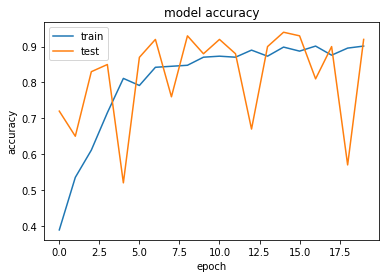

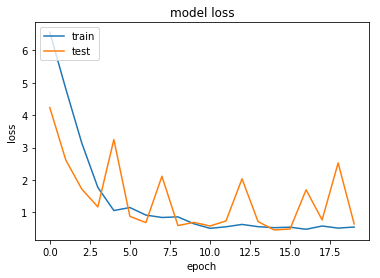

In [34]:
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

print(x_train[0],x_test[0],y_train[0],y_test[0])

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

model = models.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=(30,)))
#model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

x_val = x_train[:100]
partial_x_train = x_train[100:]
y_val = y_train[:100]
partial_y_train = y_train[100:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))

model.predict(x_test)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy']) # changed from acc
plt.plot(history.history['val_binary_accuracy']) # changed from val_acc
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
